In [6]:
import pandas as pd
file_path = r"C:\Users\HP\Downloads\LoanApprovalPrediction.csv"
df = pd.read_csv(file_path)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.fillna(df.median(numeric_only=True), inplace=True)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = encoder.fit_transform(df[col])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0.0,0,0,5849,0.0,127.0,360.0,1.0,2,1
1,1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [10]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=["Loan_Status"])
y = df["Loan_Status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

Training set: (478, 12), Testing set: (120, 12)


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

Random Forest Accuracy: 0.80


In [12]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_preds)
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")

Logistic Regression Accuracy: 0.82


In [13]:
from sklearn.metrics import classification_report
print("Random Forest Performance:")
print(classification_report(y_test, rf_preds))
print("Logistic Regression Performance:")
print(classification_report(y_test, lr_preds))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.79      0.43      0.56        35
           1       0.80      0.95      0.87        85

    accuracy                           0.80       120
   macro avg       0.80      0.69      0.71       120
weighted avg       0.80      0.80      0.78       120

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.94      0.43      0.59        35
           1       0.81      0.99      0.89        85

    accuracy                           0.82       120
   macro avg       0.87      0.71      0.74       120
weighted avg       0.85      0.82      0.80       120



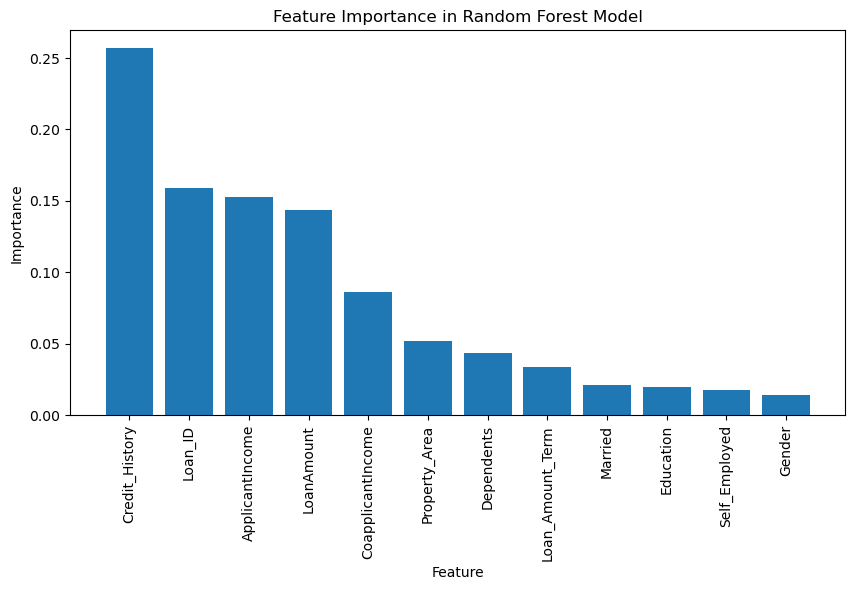

In [14]:
import matplotlib.pyplot as plt
importances = rf_model.feature_importances_
feature_names = X.columns
sorted_indices = importances.argsort()[::-1]
plt.figure(figsize=(10, 5))
plt.bar(range(len(importances)), importances[sorted_indices], align="center")
plt.xticks(range(len(importances)), feature_names[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest Model")
plt.show()

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_preds)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

Decision Tree Accuracy: 0.81


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_preds)
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_preds)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")

Random Forest Accuracy: 0.80
Decision Tree Accuracy: 0.81
Logistic Regression Accuracy: 0.82


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best Accuracy: 0.8096491228070176


In [20]:
best_rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    random_state=42
)
best_rf_model.fit(X_train, y_train)
best_rf_preds = best_rf_model.predict(X_test)
best_rf_accuracy = accuracy_score(y_test, best_rf_preds)
print(f"Best Random Forest Accuracy: {best_rf_accuracy:.2f}")

Best Random Forest Accuracy: 0.82


In [21]:
best_rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    random_state=42
)
best_rf_model.fit(X_train, y_train)
best_rf_preds = best_rf_model.predict(X_test)
best_rf_accuracy = accuracy_score(y_test, best_rf_preds)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_preds)
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_preds)
print(f"Best Random Forest Accuracy: {best_rf_accuracy:.2f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")

Best Random Forest Accuracy: 0.82
Decision Tree Accuracy: 0.81
Logistic Regression Accuracy: 0.82


In [26]:
def predict_loan_approval():
    print("Please enter the following details for loan approval prediction:")
    gender = int(input("Enter Gender (1 for Male, 0 for Female): "))
    married = int(input("Enter Married (1 for Yes, 0 for No): "))
    income = float(input("Enter Applicant Income (e.g., 5000): "))
    loan_amount = float(input("Enter Loan Amount (e.g., 150): "))
    credit_history = int(input("Enter Credit History (1 for Good, 0 for Bad): "))
    print("Enter Property Area (1 for Semiurban, 2 for Urban, 3 for Rural): ")
    property_area = int(input("Enter Property Area (1 for Semiurban, 2 for Urban, 3 for Rural): "))
    dependents = int(input("Enter Number of Dependents (e.g., 0 for none, 1 for one dependent, etc.): "))
    education = int(input("Enter Education (1 for Graduate, 0 for Not Graduate): "))
    self_employed = int(input("Enter Self Employed (1 for Yes, 0 for No): "))
    new_data = {
        'Gender': [gender],
        'Married': [married],
        'ApplicantIncome': [income],
        'LoanAmount': [loan_amount],
        'Credit_History': [credit_history],
        'Property_Area': [property_area],
        'Dependents': [dependents],
        'Education': [education],
        'Self_Employed': [self_employed],
        'Loan_ID': [0],
        'CoapplicantIncome': [0],
        'Loan_Amount_Term': [360],
    }
    new_data_df = pd.DataFrame(new_data)
    new_data_df = new_data_df[X.columns]
    prediction = best_rf_model.predict(new_data_df)
    if prediction == 1:
        print("Loan Approved!")
    else:
        print("Loan Not Approved!")
predict_loan_approval()

Please enter the following details for loan approval prediction:


Enter Gender (1 for Male, 0 for Female):  1
Enter Married (1 for Yes, 0 for No):  0
Enter Applicant Income (e.g., 5000):  10000
Enter Loan Amount (e.g., 150):  100000
Enter Credit History (1 for Good, 0 for Bad):  0


Enter Property Area (1 for Semiurban, 2 for Urban, 3 for Rural): 


Enter Property Area (1 for Semiurban, 2 for Urban, 3 for Rural):  2
Enter Number of Dependents (e.g., 0 for none, 1 for one dependent, etc.):  3
Enter Education (1 for Graduate, 0 for Not Graduate):  1
Enter Self Employed (1 for Yes, 0 for No):  0


Loan Not Approved!


In [27]:
import joblib
joblib.dump(best_rf_model, 'loan_approval_model.pkl')

['loan_approval_model.pkl']